# Visualize Model Outputs

This notebook goes over how to visualize the outputs for nowcasts

Author: Akshay Aravamudan (aaravamudan2014@my.fit.edu)

Last Edited: Jan 21, 2025

In [5]:
import numpy as np

event_name = 1

# convlstm_output = np.load('results/convlstm_'+str(event_name)+'_outputs.npy')
steps_output = np.load('results/steps_'+str(event_name)+'_outputs.npy')
lagrangian_output = np.load('results/lagrangian_'+str(event_name)+'_outputs.npy')
naive_output = np.load('results/naive_'+str(event_name)+'_outputs.npy')

## Generate GIFs

original shape (97, 360, 516)
Precipitation Dataset input shape:  (74, 12, 1, 360, 516)
Precipitation Dataset output shape:  (74, 12, 1, 360, 516)


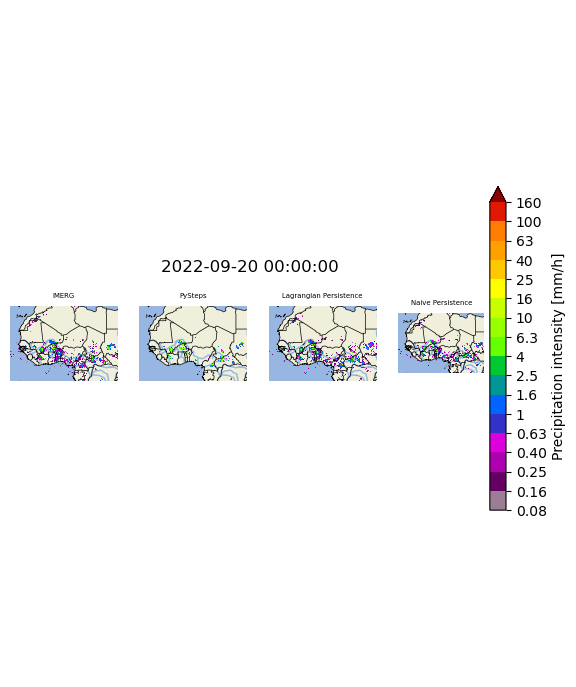

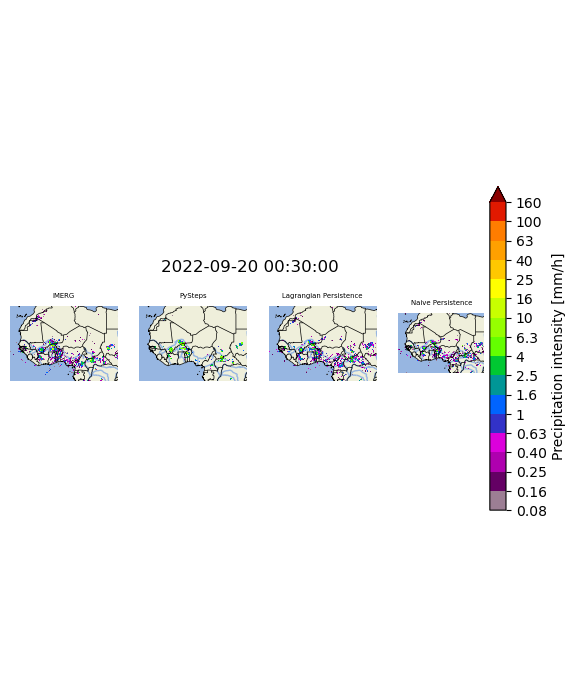

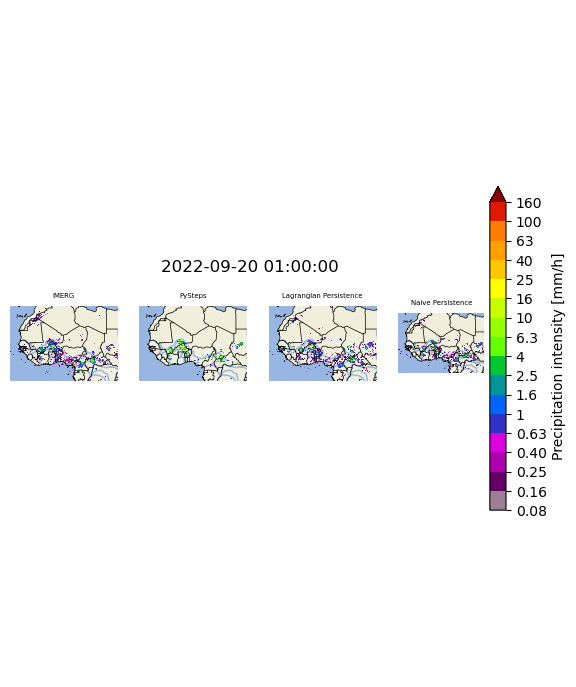

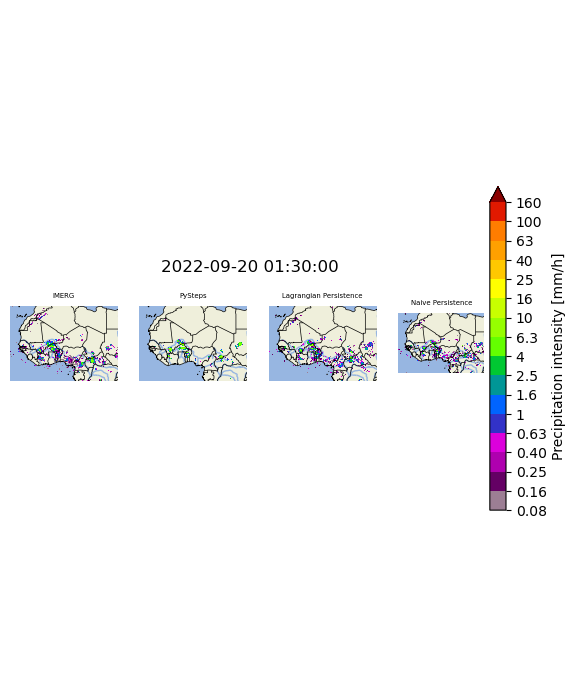

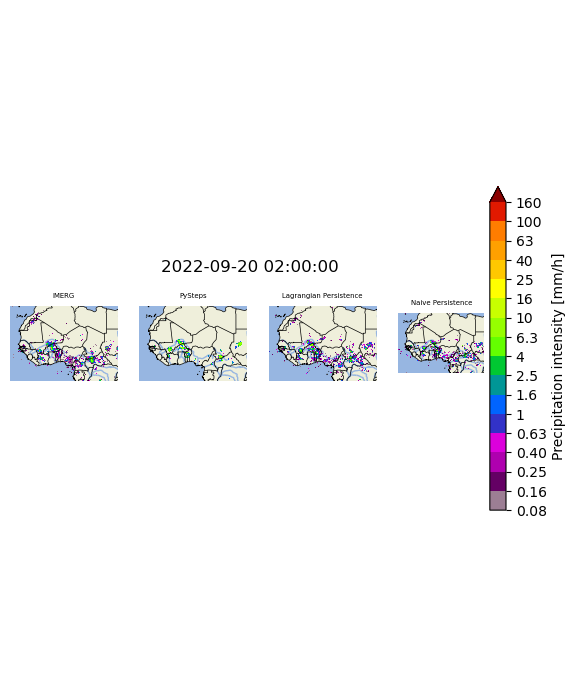

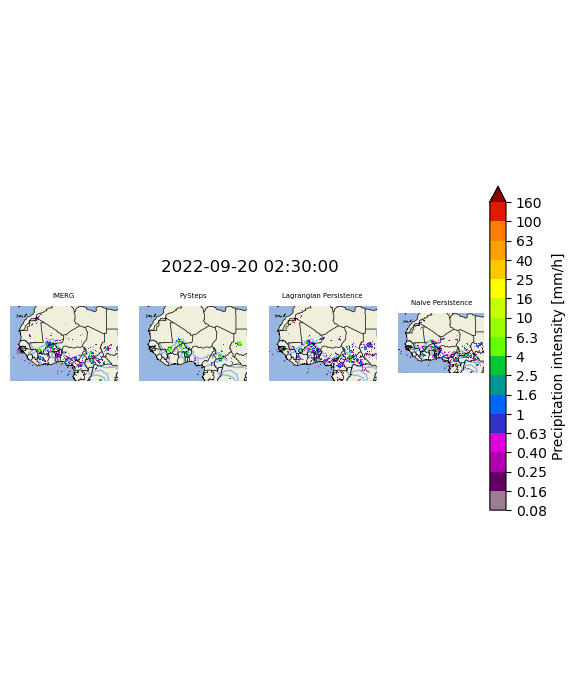

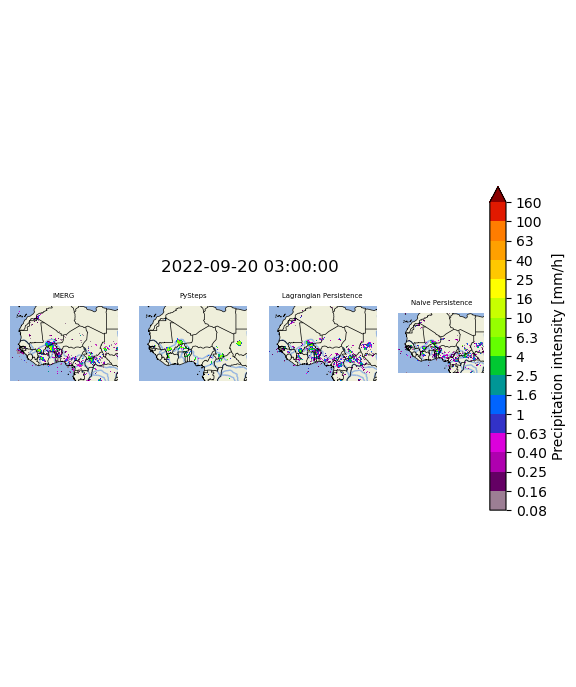

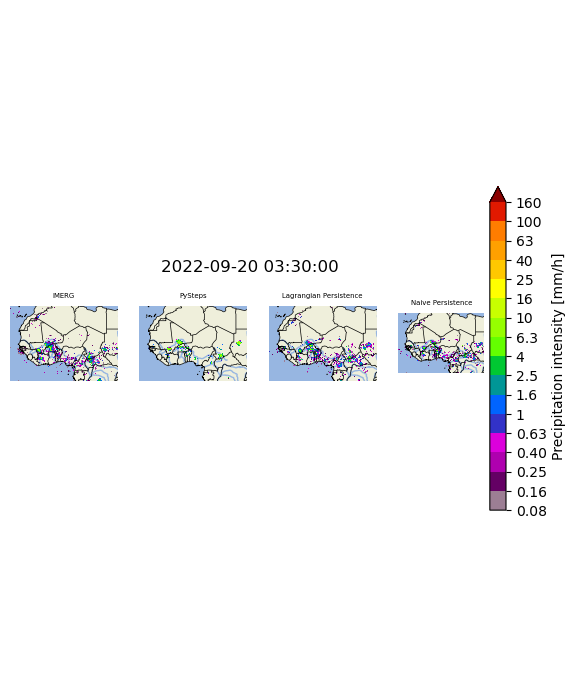

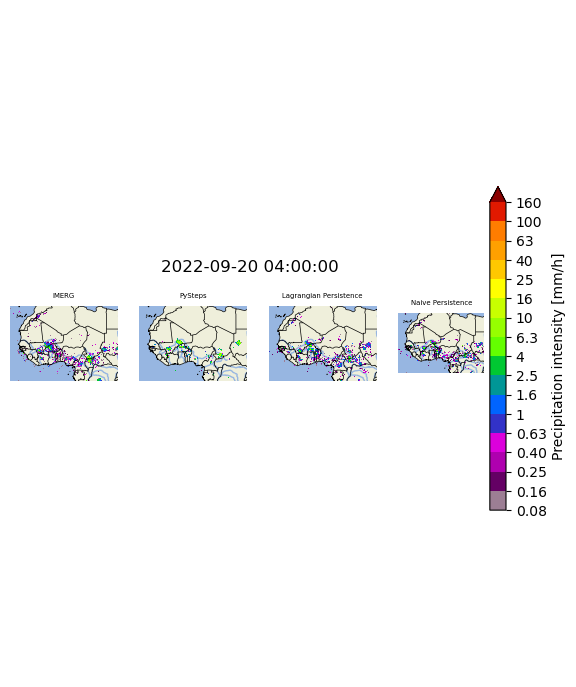

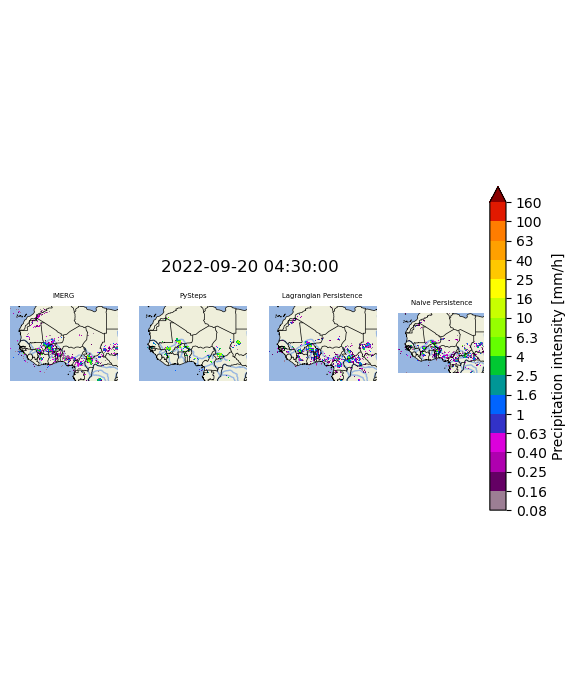

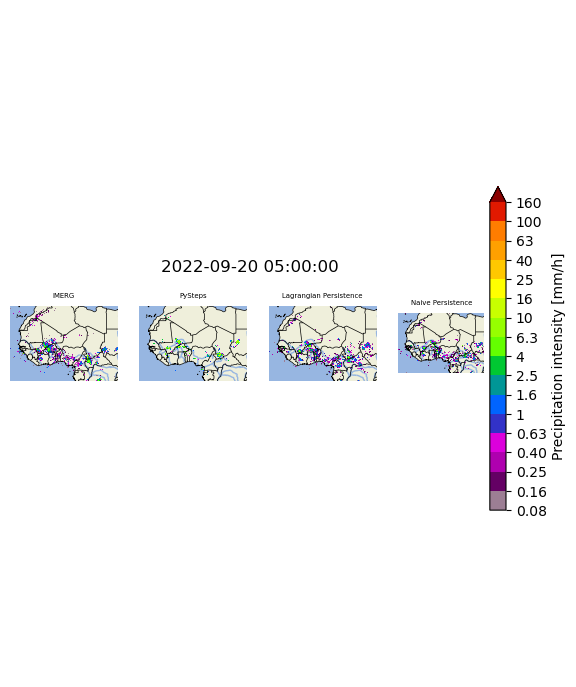

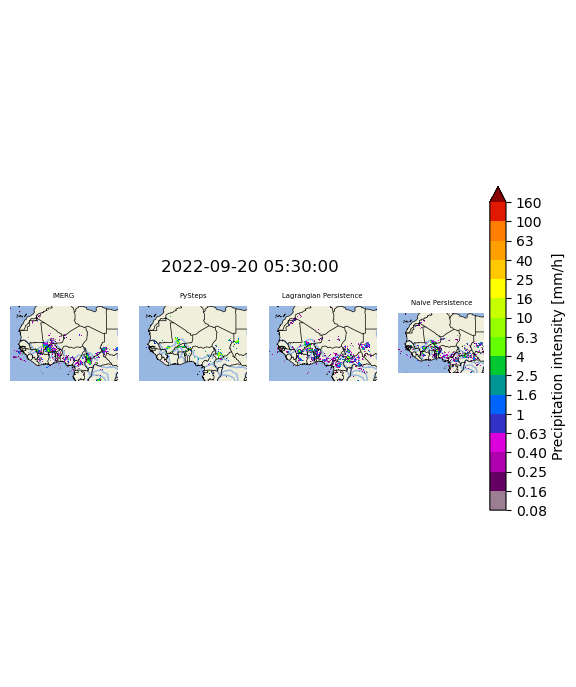

In [6]:
from servir.visualizations.gif_creation import create_precipitation_gif_multiple_comparison
import json
from servir.utils.data_provider import IMERGDataModule

prediction_timestep = 35

event_id = 1
h5_dataset_location = '../../data/events/'+str(event_id)+'.h5'
ir_h5_dataset_location = None
metadata_location = '../../data/events/'+str(event_id)+'/metadata.json'
dataset_type = 'wa'
data_provider =  IMERGDataModule(
        forecast_steps = 12,
        history_steps = 12,
        imerg_filename = h5_dataset_location,
        ir_filename = ir_h5_dataset_location,
        batch_size = 32,
        image_shape = (360, 516),
        normalize_data=False,
        dataset = dataset_type)

data_loader = data_provider.test_dataloader()

with open(metadata_location) as jsonfile:
    geodata_dict = json.loads(jsonfile.read())


timestamps_obs = data_provider.test_dataset.get_output_timestamps()[prediction_timestep]
gt_output = data_provider.test_dataset.get_output_precipitation()

create_precipitation_gif_multiple_comparison([gt_output[prediction_timestep], steps_output[prediction_timestep],
                                              lagrangian_output[prediction_timestep], naive_output[prediction_timestep]], 
                                             labels = ['IMERG', 'PySteps', 'Lagrangian Persistence', 'Naive Persistence'],
                                             timestamps_obs = timestamps_obs, 
                                             timestep_min = 30, 
                                             geodata = geodata_dict, 
                                             path_outputs = 'results/', 
                                             title=str(event_id) +'_'+ str(prediction_timestep), 
                                             gif_dur = 200)
